# Analyse results of multiclass training (37 breeds)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [43]:

# Read the confusion matrix data from CSV
df = pd.read_csv('../results/wandb/E_del/multiclass_test_result_wandb_01.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Actual        1369 non-null   object
 1   Predicted     1369 non-null   object
 2   nPredictions  1369 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 32.2+ KB


In [45]:
df.head()

,Actual,Predicted,nPredictions
0,Abyssinian,Abyssinian,12
1,Abyssinian,american_bulldog,0
2,Abyssinian,american_pit_bull_terrier,0
3,Abyssinian,basset_hound,0
4,Abyssinian,beagle,1


In [46]:
df.Actual

0              Abyssinian
1              Abyssinian
2              Abyssinian
3              Abyssinian
4              Abyssinian
              ...        
1364    yorkshire_terrier
1365    yorkshire_terrier
1366    yorkshire_terrier
1367    yorkshire_terrier
1368    yorkshire_terrier
Name: Actual, Length: 1369, dtype: object

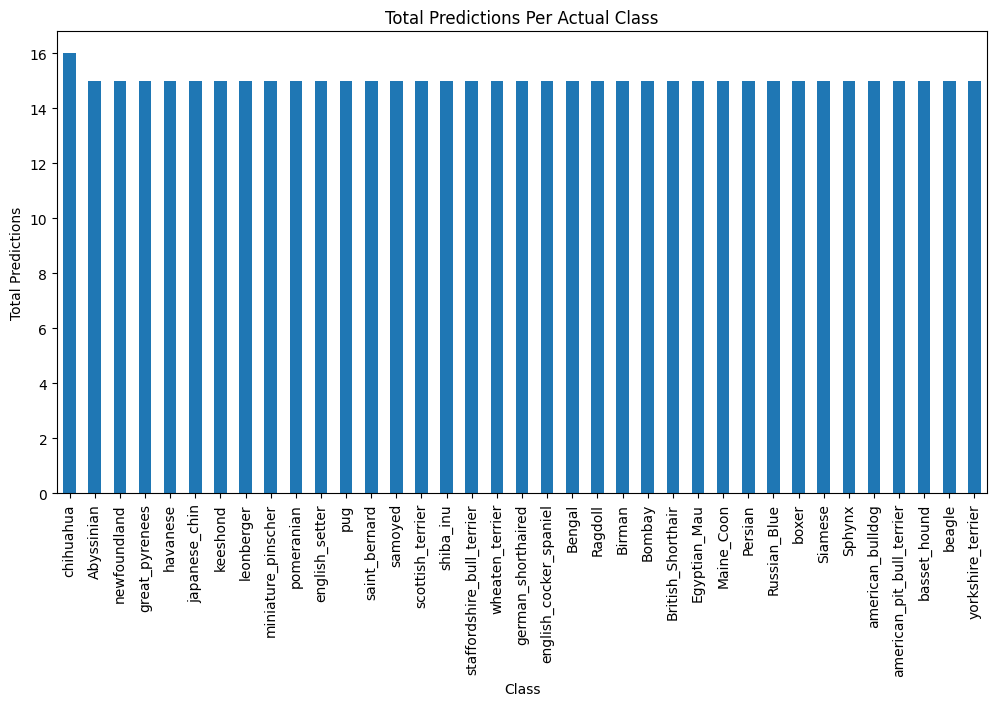

In [47]:
# Counting total predictions per actual class
total_predictions_per_class = df.groupby("Actual")["nPredictions"].sum().sort_values(ascending=False)
total_predictions_per_class.plot(kind="bar", figsize=(12, 6))
plt.title("Total Predictions Per Actual Class")
plt.xlabel("Class")
plt.ylabel("Total Predictions")
plt.xticks(rotation=90)
plt.show()


In [48]:
# Creating a confusion matrix (pivot table)
confusion_matrix = df.pivot(index="Actual", columns="Predicted", values="nPredictions").fillna(0)
confusion_matrix


Predicted,Abyssinian,Bengal,Birman,Bombay,British_Shorthair,Egyptian_Mau,Maine_Coon,Persian,Ragdoll,Russian_Blue,...,newfoundland,pomeranian,pug,saint_bernard,samoyed,scottish_terrier,shiba_inu,staffordshire_bull_terrier,wheaten_terrier,yorkshire_terrier
Actual,,,,,,,,,,,,,,,,,,,,,
Abyssinian,12,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bengal,1,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Birman,0,0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bombay,1,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
British_Shorthair,0,0,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Egyptian_Mau,0,0,0,0,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Maine_Coon,0,0,0,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Persian,0,0,0,0,0,0,0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
Ragdoll,0,0,0,0,0,0,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0


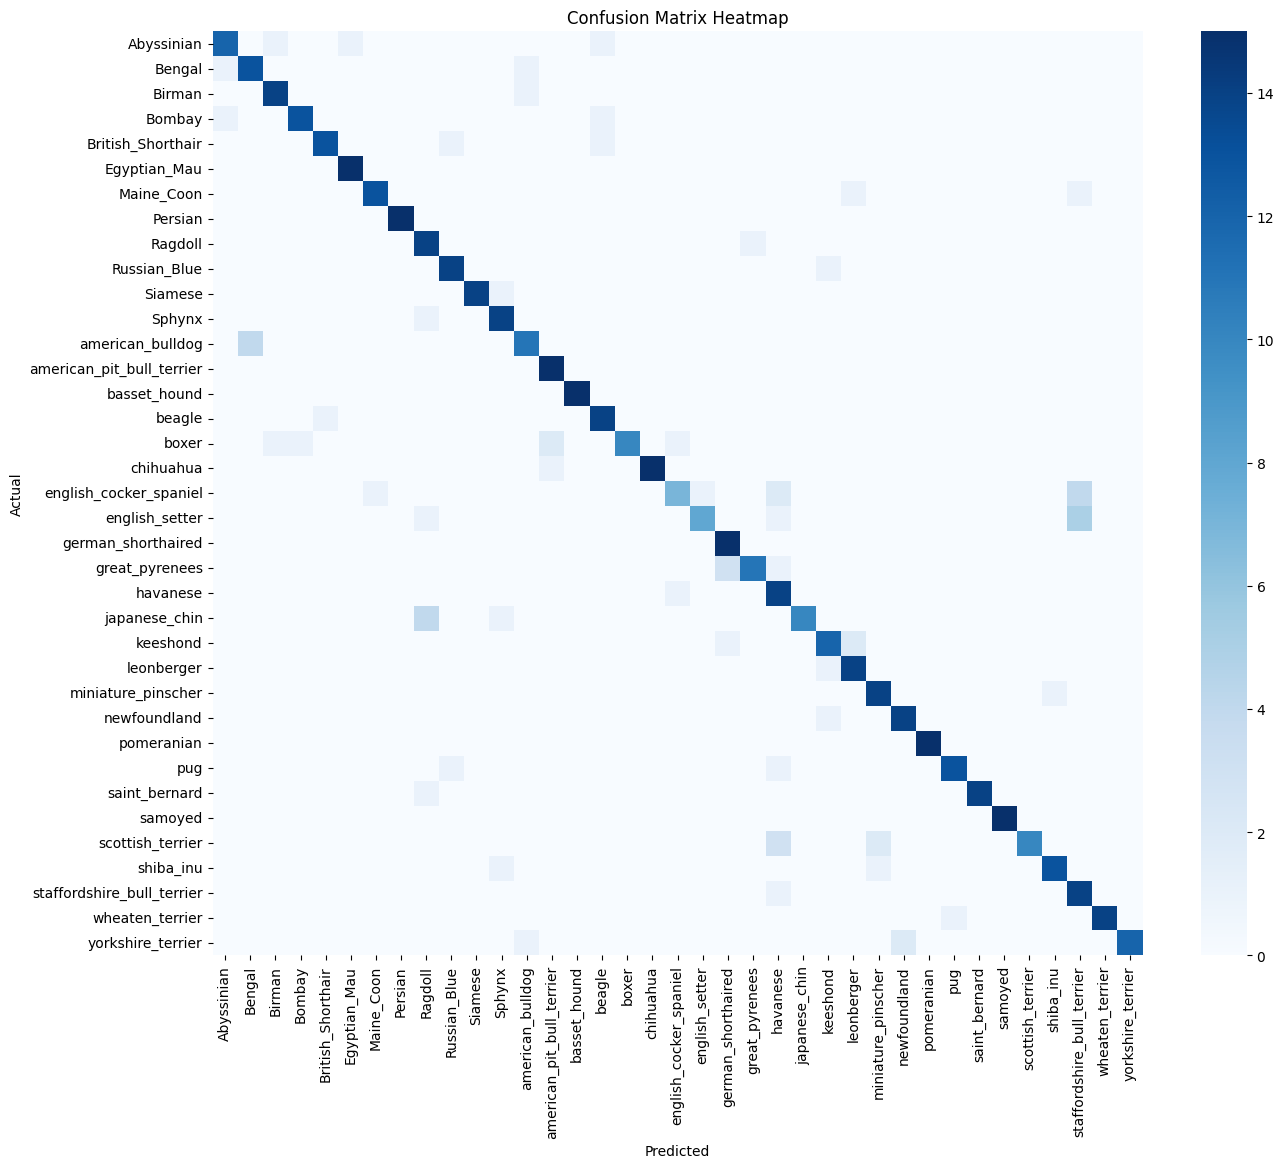

In [49]:
# Heatmap of the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(confusion_matrix, cmap="Blues", annot=False)
plt.title("Confusion Matrix Heatmap")
plt.show()


In [50]:
# Calculating precision, recall, and F1-score for each class
class_metrics = []

for actual in df['Actual'].unique():
    tp = df[(df['Actual'] == actual) & (df['Predicted'] == actual)]['nPredictions'].sum()
    fp = df[(df['Actual'] != actual) & (df['Predicted'] == actual)]['nPredictions'].sum()
    fn = df[(df['Actual'] == actual) & (df['Predicted'] != actual)]['nPredictions'].sum()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    class_metrics.append([actual, precision, recall, f1])

metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score'])
metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)
metrics_df.head(37)


,Class,Precision,Recall,F1-Score
23,Persian,1.000000,1.000000,1.000000
3,basset_hound,1.000000,1.000000,1.000000
29,samoyed,1.000000,1.000000,1.000000
24,pomeranian,1.000000,1.000000,1.000000
10,chihuahua,1.000000,0.937500,0.967742
11,Egyptian_Mau,0.937500,1.000000,0.967742
28,saint_bernard,1.000000,0.933333,0.965517
32,Siamese,1.000000,0.933333,0.965517
35,wheaten_terrier,1.000000,0.933333,0.965517
2,american_pit_bull_terrier,0.833333,1.000000,0.909091


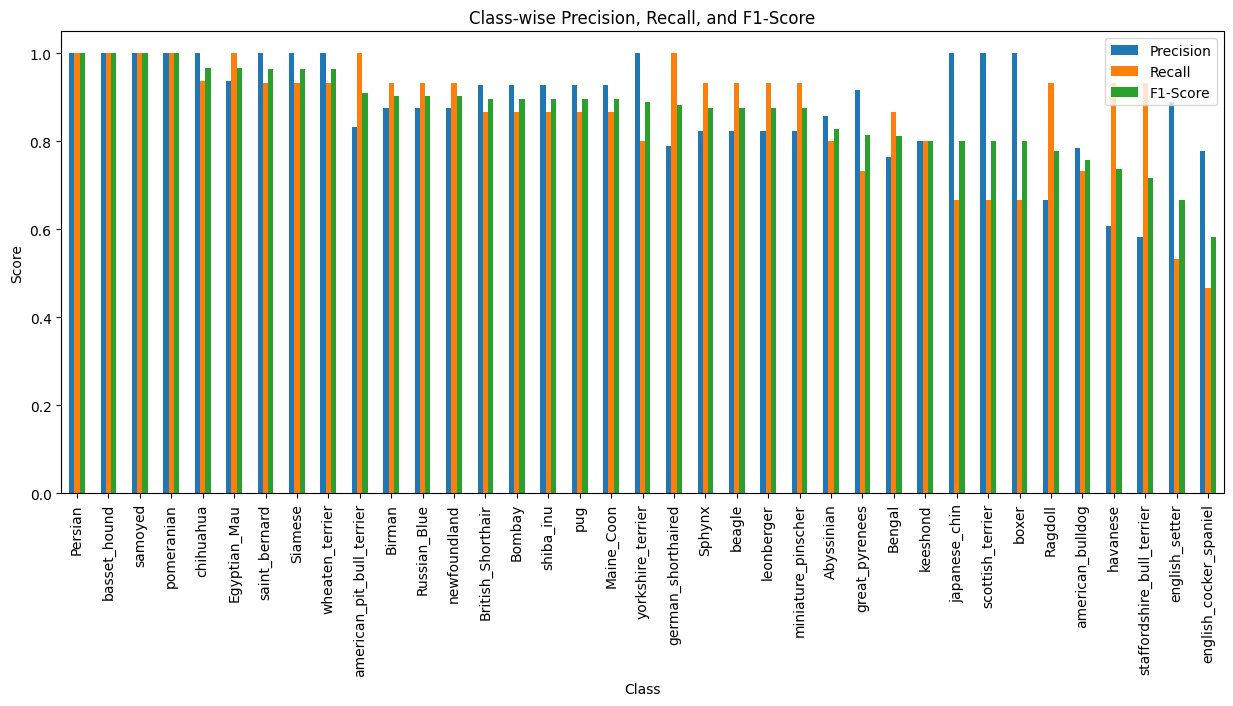

In [51]:
# Plotting class-wise precision, recall, and F1-Score
metrics_df.set_index('Class').plot(kind='bar', figsize=(15, 6))
plt.title("Class-wise Precision, Recall, and F1-Score")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.show()


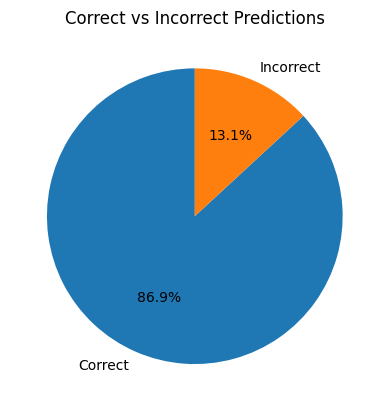

In [52]:
# Counting correct and incorrect predictions
df['Correct'] = df['Actual'] == df['Predicted']
correct_predictions = df[df['Correct'] == True]['nPredictions'].sum()
incorrect_predictions = df[df['Correct'] == False]['nPredictions'].sum()

plt.pie([correct_predictions, incorrect_predictions], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=90)
plt.title("Correct vs Incorrect Predictions")
plt.show()


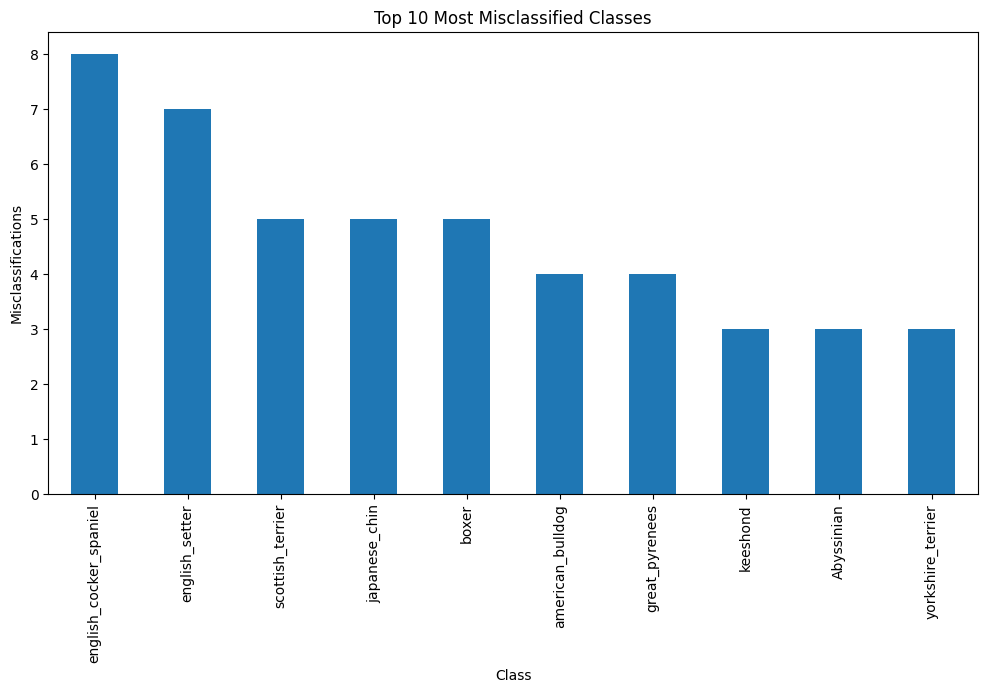

In [53]:
# Top 10 most misclassified classes
misclassified = df[df['Correct'] == False]
misclassified_counts = misclassified.groupby(['Actual'])['nPredictions'].sum().sort_values(ascending=False).head(10)

misclassified_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Most Misclassified Classes")
plt.xlabel("Class")
plt.ylabel("Misclassifications")
plt.show()


In [54]:
# Most confused class pairs (excluding correct predictions)
confusion_pairs = df[df['Correct'] == False].sort_values(by='nPredictions', ascending=False).head(10)

# Displaying the top 10 most confused class pairs
confusion_pairs[['Actual', 'Predicted', 'nPredictions']]


,Actual,Predicted,nPredictions
515,english_setter,staffordshire_bull_terrier,5
655,japanese_chin,Ragdoll,4
478,english_cocker_spaniel,staffordshire_bull_terrier,4
42,american_bulldog,Bengal,4
1126,scottish_terrier,havanese,3
569,great_pyrenees,german_shorthaired,3
298,boxer,american_pit_bull_terrier,2
460,english_cocker_spaniel,havanese,2
1131,scottish_terrier,miniature_pinscher,2
685,keeshond,leonberger,2
